In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
from ast import literal_eval
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
bitcoin_news=newsapi.get_everything(q='Bitcoin',language='en',page_size=100)
bitcoin_news['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news=newsapi.get_everything(q='Ethereum',language='en',page_size=100)
ethereum_news['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'Sharding, scalability, decentralization – You name it, we’ve got it on the EC stage in Berlin',
 'description': 'Sharding and scalability. Transactions per second. Crypto-ecosystems. The decentralized web. These are the voyages of the Starship Blockchain, on it’s 5-year mission to seek out… Ok, you get the drift! But as you can tell, there remain many, many issues to te…',
 'url': 'http://techcrunch.com/2019/11/20/sharding-scalability-decentralization-you-name-it-weve-got-it-on-the-ec-stage-in-berlin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/11/drake-egan-tyler.jpg?w=711',
 'publishedAt': '2019-11-20T14:24:38Z',
 'content': 'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain 

In [7]:
def generate_sentiments(articles):
    sentiments=[]
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu

            })
        except AttributeError:
            pass
                
    return sentiments

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=pd.DataFrame(generate_sentiments(bitcoin_news['articles']))
cols = ['Compound','Negative','Neutral','Positive','Text']
bitcoin_sentiments = bitcoin_sentiments[cols]

bitcoin_sentiments.head()


,Compound,Negative,Neutral,Positive,Text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.0000,0.000,1.000,0.000,High school students in France may be among th...
2,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments=pd.DataFrame(generate_sentiments(ethereum_news['articles']))
cols = ['Compound','Negative','Neutral','Positive','Text']
ethereum_sentiments = ethereum_sentiments[cols]

ethereum_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...
1,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
2,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.149393,0.039804,0.898402,0.061814
std,0.440124,0.054928,0.074851,0.052803
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.102700,0.000000,0.857000,0.000000
50%,0.202300,0.000000,0.926000,0.066000
75%,0.507000,0.068000,0.945000,0.087000
max,0.914100,0.271000,1.000000,0.249000


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.177229,0.026906,0.916885,0.056198
std,0.405316,0.048792,0.070818,0.053464
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.892500,0.000000
50%,0.273000,0.000000,0.930000,0.057000
75%,0.481000,0.045250,0.954250,0.098000
max,0.757900,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    lemmatizer = WordNetLemmatizer()
    sentence_clean=regex.sub('', text)
    words=word_tokenize(sentence_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words('english'))
    sw_addon = {'(',')',',','.','[',']',':',':','fucking','fuck','said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also','ha'}
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return output


In [15]:
# Create a new tokens column for bitcoin
bitcoin_sentiments['Tokens']=[tokenizer(r) for r in bitcoin_sentiments['Text']]
bitcoin_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
2,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
...,...,...,...,...,...,...
92,0.0000,0.000,1.000,0.000,Bitcoin prices have quietly been in meltdown m...,"[bitcoin, price, quietly, meltdown, mode, rece..."
93,0.1531,0.037,0.911,0.051,Illustration by Stephen Shankland/CNET\r\nAfte...,"[illustration, stephen, shanklandcnetafter, fo..."
94,0.2023,0.047,0.887,0.067,After seeing its IPO dreams slashed earlier th...,"[seeing, ipo, dream, slashed, earlier, year, b..."
95,-0.7140,0.184,0.736,0.080,"I hate to be the bearer of bad news, but victi...","[hate, bearer, bad, news, victim, lost, money,..."


In [16]:
# Create a new tokens column for ethereum
ethereum_sentiments['Tokens']=[tokenizer(r) for r in ethereum_sentiments['Text']]
ethereum_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...,"[sharding, scalability, transactions, per, sec..."
1,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
2,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, picking, pace, since, inception, ..."
...,...,...,...,...,...,...
91,0.5574,0.000,0.897,0.103,Distributed naming system Ethereum Name Servic...,"[distributed, naming, system, ethereum, name, ..."
92,-0.5106,0.095,0.905,0.000,Team lead at the Ethereum (ETH) Foundation Pét...,"[team, lead, ethereum, eth, foundation, pter, ..."
93,-0.5423,0.106,0.894,0.000,A Spanish financial watchdog has issued a warn...,"[spanish, financial, watchdog, issued, warning..."
94,0.1280,0.000,0.962,0.038,New financial products are coming to tezos (XT...,"[new, financial, product, coming, tezos, xtz, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def bigram_counter(tokens):
    
    bigram_count= dict(Counter(ngrams(tokens, n=2)))
    return pd.DataFrame(list(bigram_count.items()), columns=['bigram', 'count'])

In [19]:
# Generate the Bitcoin N-grams where N=2
all_bitcoin_tokens = []
for x in range(0,len(bitcoin_sentiments)):
    for y in bitcoin_sentiments['Tokens'][x]:
        all_bitcoin_tokens.append(y)
bigram_counter(all_bitcoin_tokens)

,bigram,count
0,"(less, two)",1
1,"(two, mile)",1
2,"(mile, icelands)",1
3,"(icelands, reykjavik)",1
4,"(reykjavik, airport)",1
...,...,...
1963,"(according, tuesday)",1
1964,"(tuesday, report)",1
1965,"(report, security)",1
1966,"(security, firm)",1


In [20]:
# Generate the Ethereum N-grams where N=2
all_eth_tokens = []
for x in range(0,len(ethereum_sentiments)):
    for y in ethereum_sentiments['Tokens'][x]:
        all_eth_tokens.append(y)
bigram_counter(all_eth_tokens)

,bigram,count
0,"(sharding, scalability)",2
1,"(scalability, transactions)",2
2,"(transactions, per)",2
3,"(per, secondcryptoecosystems)",2
4,"(secondcryptoecosystems, thedecentralized)",2
...,...,...
1953,"(matter, day)",1
1954,"(day, gods)",1
1955,"(unchained, clogging)",1
1956,"(clogging, blockchainlilith)",1


In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    bigrams = ngrams(tokens,n=1)
    top_10 = dict(Counter(bigrams).most_common(N))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
   

In [22]:
# Get the top 10 words for Bitcoin
bitcoin_10=token_count(all_bitcoin_tokens)
bitcoin_10

,bigram,count
0,"(bitcoin,)",97
1,"(char,)",96
2,"(satoshi,)",41
3,"(nakaboto,)",38
4,"(cryptocurrency,)",31
5,"(btc,)",27
6,"(past,)",22
7,"(say,)",22
8,"(another,)",21
9,"(writes,)",20


In [23]:
# Get the top 10 words for Ethereum
ethereum_10=token_count(all_eth_tokens)
ethereum_10

,bigram,count
0,"(char,)",96
1,"(ethereum,)",67
2,"(blockchain,)",27
3,"(day,)",26
4,"(bitcoin,)",25
5,"(cryptocurrency,)",21
6,"(morning,)",16
7,"(price,)",14
8,"(early,)",12
9,"(startup,)",10


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

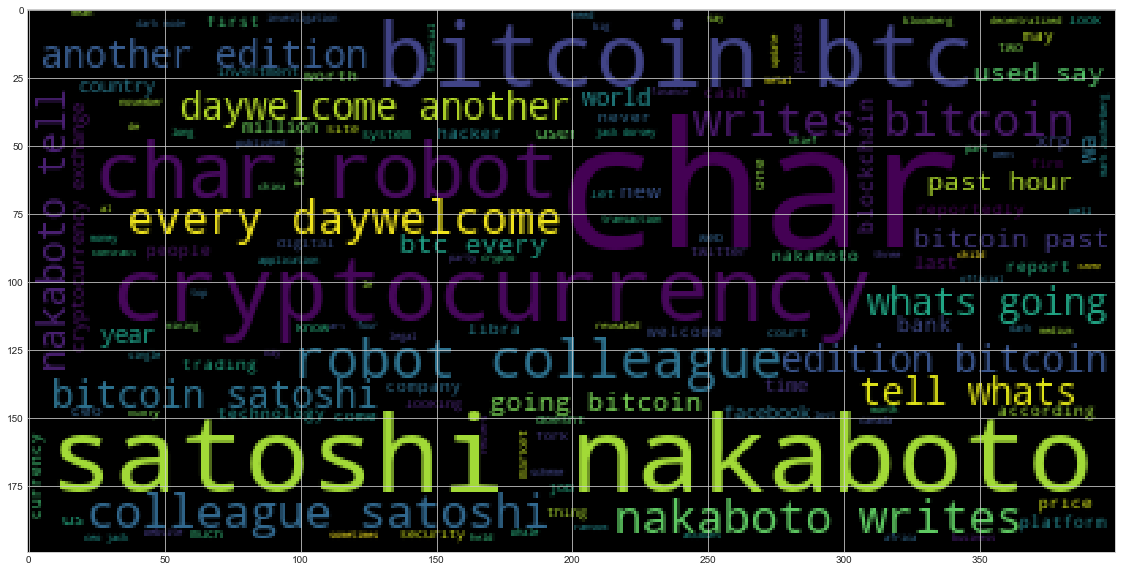

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_bitcoin_tokens))
plt.imshow(wc)

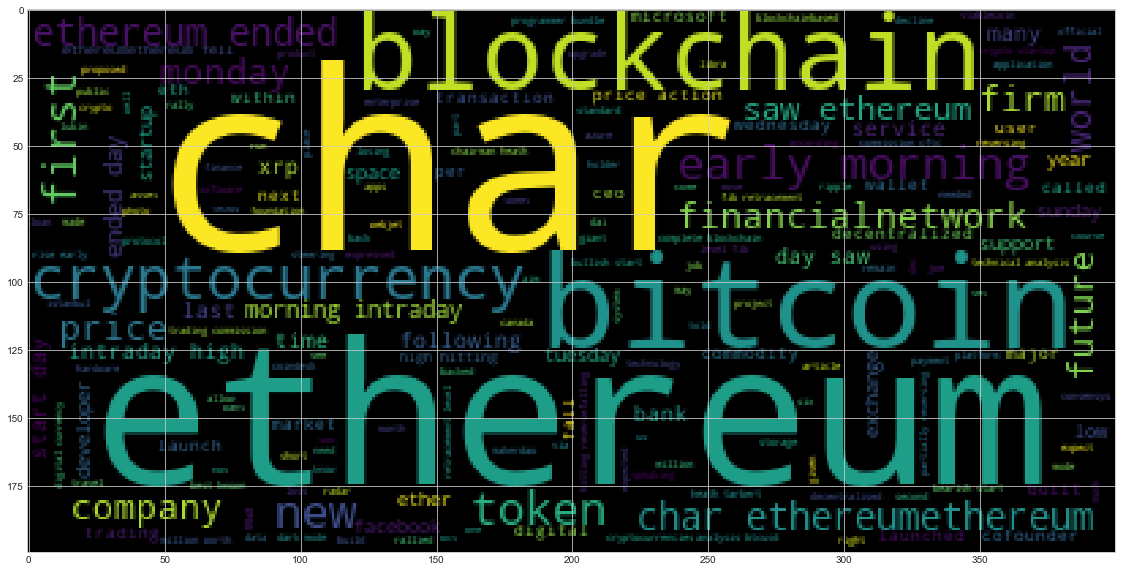

In [26]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_eth_tokens))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
big_text=bitcoin_sentiments.Text.sum()
big_text

'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars]TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it\'s a worthy investment, and it when it comes to top… [+1491 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been 

In [31]:
# Run the NER processor on all of the text
doc = nlp(big_text)
# Add a title to the document



In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Less than two miles QUANTITY
Reykjavik airport FAC
tens of thousands CARDINAL
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Square ORG
Jack Dorsey PERSON
Bitcoin PERSON
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin PERSON
Africa LOC
Nigeria GPE
Ghana GPE
Mini ORG
+19

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
big_text=ethereum_sentiments.Text.sum()
big_text

'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain many, many issues to tea… [+3851 chars]TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it\'s a worthy investment, and it when it comes to top… [+1491 chars]Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars]he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it

In [35]:
# Run the NER processor on all of the text
doc = nlp(big_text)
# Add a title to the document

In [36]:
# Render the visualization
displacy.render(doc, style='ent')

# List all Entities

In [37]:
for ent in doc.ents:
    print(ent.text, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Berlin GPE
December 11 and December 12 DATE
+14834 chars]he plaBy PERSON
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto PERSON
Bitcoin PERSON
Blockchai GPE
+9390 chars]Reuters WORK_OF_ART
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg GPE
countrys NORP
Swiss NORP
Block ORG
$400 million MONEY
XRP ORG
Ponzi ORG
XRP ORG
London GPE
Elliptic NORP
less than 0.2 percent PERCENT
XRP ORG
Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Royal Bank of Canada ORG
Opera ORG
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
XRP ORG
XRP ORG
Bitcoin PERSON
XRP ORG
third ORDINAL
Bitcoin PERSON
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
first ORDINAL
last week DATE
Chinese NORP
2021 DATE
first ORDINAL
last year DATE
Chinese NORP
Tencent GPE
count